In [25]:
from kedro.io import DataCatalog
from kedro_datasets.pandas import ParquetDataset
import pandas as pd

catalog =  DataCatalog(
    {
        "assistance_train_dataset_1": ParquetDataset(filepath="data/01_raw/assistance_train_dataset_1.parquet"),
        "assistance_train_dataset_2": ParquetDataset(filepath="data/01_raw/assistance_train_dataset_2.parquet"),
        "assistance_train_dataset_3": ParquetDataset(filepath="data/01_raw/assistance_train_dataset_3.parquet"),
    }
)

In [20]:
assistance_train_dataset_1 = catalog.load("assistance_train_dataset_1")
assistance_train_dataset_2 = catalog.load("assistance_train_dataset_2")
assistance_train_dataset_3 = catalog.load("assistance_train_dataset_3")

[12/13/24 01:31:58] INFO     Loading data from assistance_train_dataset_1 (ParquetDataset)...   ]8;id=229795;file:///projects/pytech-falck-competition/venv/lib/python3.12/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=315223;file:///projects/pytech-falck-competition/venv/lib/python3.12/site-packages/kedro/io/data_catalog.py#389\389]8;;\

[12/13/24 01:31:59] INFO     Loading data from assistance_train_dataset_2 (ParquetDataset)...   ]8;id=236218;file:///projects/pytech-falck-competition/venv/lib/python3.12/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=461419;file:///projects/pytech-falck-competition/venv/lib/python3.12/site-packages/kedro/io/data_catalog.py#389\389]8;;\

[12/13/24 01:32:00] INFO     Loading data from assistance_train_dataset_3 (ParquetDataset)...   ]8;id=135082;file:///projects/pytech-falck-competition/venv/lib/python3.12/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=977163;file:///projects/pytech-falck-competition/venv/lib/python3.12/site-packages/kedro/io/data_catalog.py#389\389]8;;\

In [21]:
assistance_train_dataset_1.head()

,EmitDate,EmitEndDate,AgentId,CallId,CallType,CallDirection,QueueName
0,2022-10-17 22:42:45.402895,2022-10-17 22:43:23.068921,5d5d6d09-8db0-4de8-8566-217e8c051f1f,sdv-pii-ou5qk,agent,outbound,1bad6b8cf97131fceab8543e81f7757195fbb1d36b376e...
1,2022-10-17 09:26:54.496597,2022-10-17 09:28:40.030373,4af305c9-28b2-4e57-bb39-c1d65237b1f9,sdv-pii-w7g3n,agent,inbound,bd51723189625f90588e977b9fb05fdf12b1b81d668f64...
2,2022-10-17 16:39:17.991224,2022-10-17 16:40:01.372890,08ee38dc-7073-4d19-bcc2-81521a959d86,sdv-pii-k50zl,agent,inbound,880c14638d515f61e00c6ddef2234db8beb8287722cb7e...
3,2022-10-17 05:52:42.032933,2022-10-17 05:52:50.419619,316e461d-7dad-4b9d-a045-50e6a9986b0e,sdv-pii-k9z02,agent,inbound,f1bc70f26a24de569b9c9b32c38e45f2144e4326a047aa...
4,2022-10-17 03:03:40.880062,2022-10-17 03:04:22.863554,f23913a4-badc-4360-98e6-20dc6620b9e8,sdv-pii-qvh6y,agent,inbound,f1bc70f26a24de569b9c9b32c38e45f2144e4326a047aa...


In [22]:
assistance_train_dataset_2.head()

,EmitDate,EmitEndDate,AgentId,CallId,CallType,CallDirection,QueueName
0,2022-12-28 14:15:26.431026,2022-12-28 14:17:39.494603,5d5d6d09-8db0-4de8-8566-217e8c051f1f,sdv-pii-fuuqs,agent,inbound,f1bc70f26a24de569b9c9b32c38e45f2144e4326a047aa...
1,2022-12-28 09:59:39.464488,2022-12-28 10:00:52.750547,60fb1f33-609f-49a6-b53a-3fc95a119e10,sdv-pii-seo6u,agent,inbound,1bad6b8cf97131fceab8543e81f7757195fbb1d36b376e...
2,2022-12-28 09:50:01.664353,2022-12-28 09:50:09.535134,837e6b57-1de9-4f48-ae24-649a79c87033,sdv-pii-eco6s,agent,inbound,880c14638d515f61e00c6ddef2234db8beb8287722cb7e...
3,2022-12-28 00:23:22.057765,2022-12-28 00:26:36.682361,5be51088-ef6a-4afa-bbd6-3dda28d0ddf6,sdv-pii-8m3aj,agent,inbound,c17033805438f07b2509ffbf5e8f35e24f8aafff5bee2c...
4,2022-12-28 18:41:13.998318,2022-12-28 18:42:26.189956,415aea5e-d6e2-43ee-bf49-09e787a19212,sdv-pii-xn3y3,user,inbound,880c14638d515f61e00c6ddef2234db8beb8287722cb7e...


In [27]:
df = pd.concat(
    [
        assistance_train_dataset_1,
        assistance_train_dataset_2,
        assistance_train_dataset_3
    ],
    ignore_index=True
)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2255345 entries, 0 to 2255344
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   EmitDate       datetime64[ns]
 1   EmitEndDate    datetime64[ns]
 2   AgentId        object        
 3   CallId         object        
 4   CallType       object        
 5   CallDirection  object        
 6   QueueName      object        
dtypes: datetime64[ns](2), object(5)
memory usage: 120.4+ MB


In [31]:
df.isna().sum()


EmitDate             0
EmitEndDate          0
AgentId          64234
CallId               0
CallType             0
CallDirection        0
QueueName            0
dtype: int64

In [37]:
df["Date"] = df["EmitDate"].dt.date
df["CallTime"] = (df["EmitEndDate"] - df["EmitDate"]).dt.total_seconds()
df.head()

,EmitDate,EmitEndDate,AgentId,CallId,CallType,CallDirection,QueueName,Date,CallTime
0,2022-10-17 22:42:45.402895,2022-10-17 22:43:23.068921,5d5d6d09-8db0-4de8-8566-217e8c051f1f,sdv-pii-ou5qk,agent,outbound,1bad6b8cf97131fceab8543e81f7757195fbb1d36b376e...,2022-10-17,37.666026
1,2022-10-17 09:26:54.496597,2022-10-17 09:28:40.030373,4af305c9-28b2-4e57-bb39-c1d65237b1f9,sdv-pii-w7g3n,agent,inbound,bd51723189625f90588e977b9fb05fdf12b1b81d668f64...,2022-10-17,105.533776
2,2022-10-17 16:39:17.991224,2022-10-17 16:40:01.372890,08ee38dc-7073-4d19-bcc2-81521a959d86,sdv-pii-k50zl,agent,inbound,880c14638d515f61e00c6ddef2234db8beb8287722cb7e...,2022-10-17,43.381666
3,2022-10-17 05:52:42.032933,2022-10-17 05:52:50.419619,316e461d-7dad-4b9d-a045-50e6a9986b0e,sdv-pii-k9z02,agent,inbound,f1bc70f26a24de569b9c9b32c38e45f2144e4326a047aa...,2022-10-17,8.386686
4,2022-10-17 03:03:40.880062,2022-10-17 03:04:22.863554,f23913a4-badc-4360-98e6-20dc6620b9e8,sdv-pii-qvh6y,agent,inbound,f1bc70f26a24de569b9c9b32c38e45f2144e4326a047aa...,2022-10-17,41.983492


In [45]:
df_agg_calls = df.groupby("Date")["EmitDate"].count().reset_index().rename(columns={"EmitDate": "Calls"})
df_agg_call_time = df.groupby("Date")["CallTime"].sum().reset_index()
df_agg_call_type = pd.crosstab(df["Date"], df["CallType"]).reset_index()
df_agg_call_direction = pd.crosstab(df["Date"], df["CallDirection"]).reset_index()

df_agg_numerical = df_agg_calls.merge(df_agg_call_time, on="Date")
df_agg_categories = df_agg_call_type.merge(df_agg_call_direction, on="Date")
df_agg = df_agg_numerical.merge(df_agg_categories, on="Date")

In [49]:
df_agg.columns = [col.capitalize() for col in df_agg.columns]
df_agg.head()

,Date,Calls,Calltime,Agent,External,User,Voicemail,Inbound,Outbound
0,2022-03-06,1635,92003.041834,1434,45,150,6,1316,319
1,2022-03-07,4242,244089.809001,3736,113,387,6,3447,795
2,2022-03-08,4413,249329.408826,3856,120,426,11,3592,821
3,2022-03-09,4487,261058.142927,3940,132,407,8,3640,847
4,2022-03-10,3826,221972.967435,3344,116,362,4,3103,723


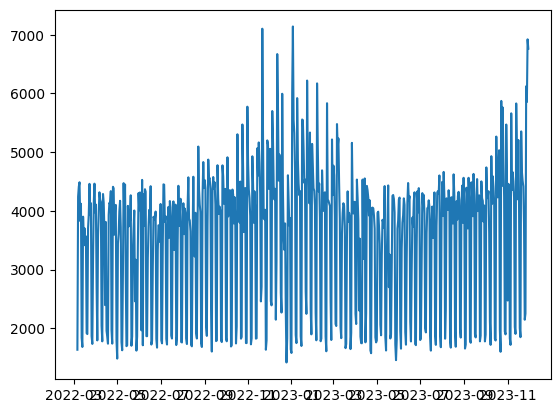

In [51]:
import matplotlib.pyplot as plt

plt.plot(df_agg["Date"], df_agg["Calls"]);